### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

In [15]:
# Llegim les dades del dataframe y preparem la columna date correctament

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}

df_cp['region_class']= df_cp['region'].map(region_classification)

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp_cleaned = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")
df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

## 1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

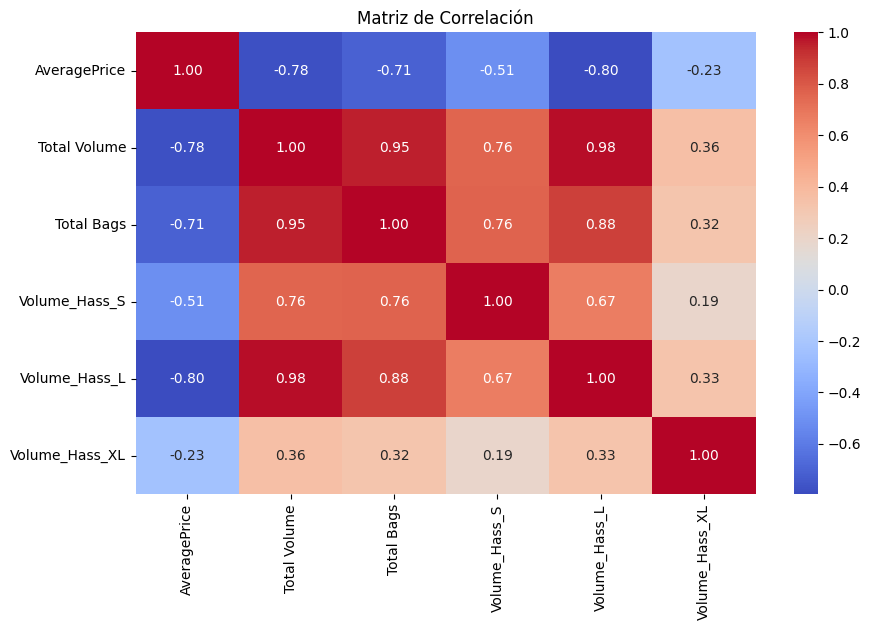

Variables altamente correlacionadas con otras: ['Total Volume', 'Total Bags', 'Volume_Hass_L']


In [2]:
df_corr_gen= df_cp.copy()

df_corr_gen = df_corr_gen[df_corr_gen['region']=='Philadelphia']

# df_corr_gen = df_corr_gen[(df_corr_gen['region_class']== 'City') | (df_corr_gen['region_class']== 'Region')]

corr_df= df_corr_gen[['AveragePrice', 'Total Volume', 'Total Bags' ,'Volume_Hass_S', 'Volume_Hass_L', 'Volume_Hass_XL']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")


## 2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

In [3]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']
df_local= df_local[df_local['region']=='TotalUS']
df_local = df_local[df_local['AveragePrice']==1.0]
display(df_local)

,Col_0,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
11798,20,2015-08-09,1.0,625259.0,170184.0,269330.0,6905.0,178838.0,126058.0,52779.0,0.0,organic,2015,TotalUS,TotalUS
11799,21,2015-08-02,1.0,573873.0,164126.0,263359.0,5115.0,141271.0,93120.0,48151.0,0.0,organic,2015,TotalUS,TotalUS
11800,22,2015-07-26,1.0,580826.0,169940.0,266249.0,4391.0,140244.0,71807.0,68436.0,0.0,organic,2015,TotalUS,TotalUS
11801,23,2015-07-19,1.0,650389.0,159752.0,317728.0,4758.0,168149.0,81667.0,86482.0,0.0,organic,2015,TotalUS,TotalUS
11802,24,2015-07-12,1.0,608845.0,178871.0,267353.0,5093.0,157526.0,80220.0,77305.0,0.0,organic,2015,TotalUS,TotalUS
11803,25,2015-07-05,1.0,668233.0,205073.0,304597.0,6251.0,152309.0,88261.0,64048.0,0.0,organic,2015,TotalUS,TotalUS


<Figure size 640x480 with 0 Axes>

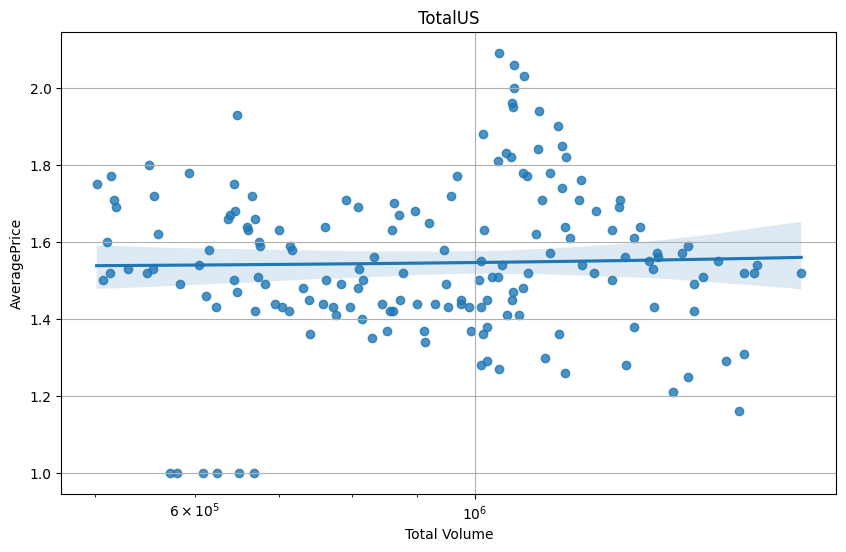

<Figure size 640x480 with 0 Axes>

In [4]:
# df_local = df_cp.copy()
# df_local= df_local[df_local['type']=='conventional']

# # df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
# df_local_USA=df_local[df_local['region_class']=='TotalUS']

# fig, ax= plt.subplots(figsize=(10,6))

# # sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
# sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
# plt.xscale('log')
# plt.grid()
# plt.title('Conventional')
# plt.figure()

df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS')
plt.figure()

<Figure size 640x480 with 0 Axes>

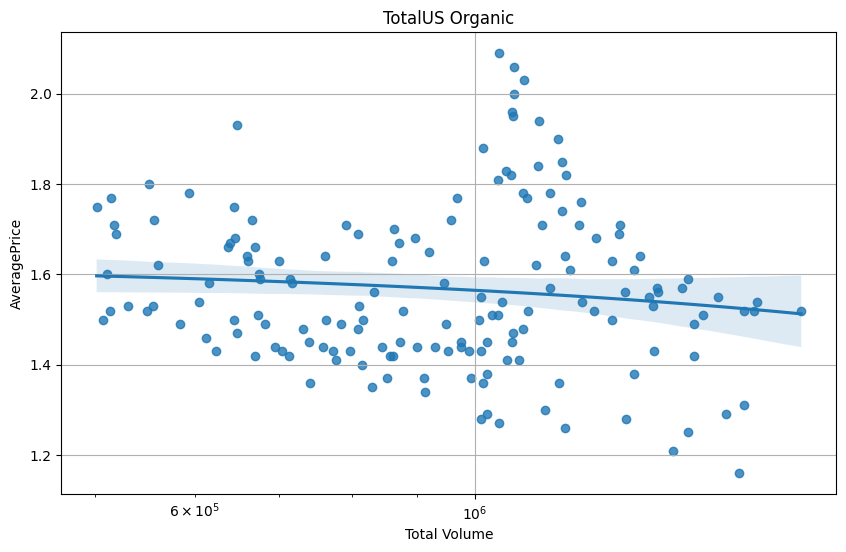

<Figure size 640x480 with 0 Axes>

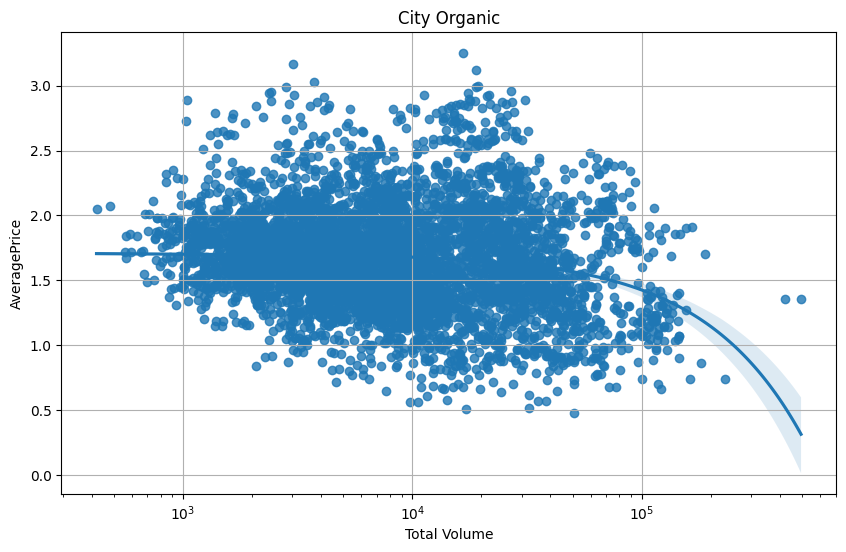

<Figure size 640x480 with 0 Axes>

In [5]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']
df_local_USA=df_local_USA[df_local_USA['AveragePrice']>1.1]

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS Organic')
plt.figure()

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_region=df_local[df_local['region_class']=='City']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_region , x=df_local_region['Total Volume'], y=df_local_region['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.title('City Organic')
plt.grid()
plt.figure()

<Figure size 640x480 with 0 Axes>

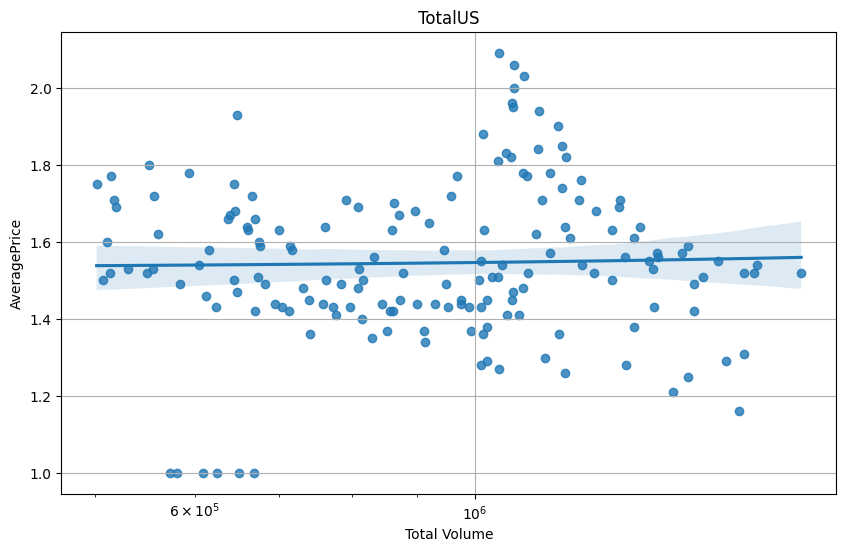

<Figure size 640x480 with 0 Axes>

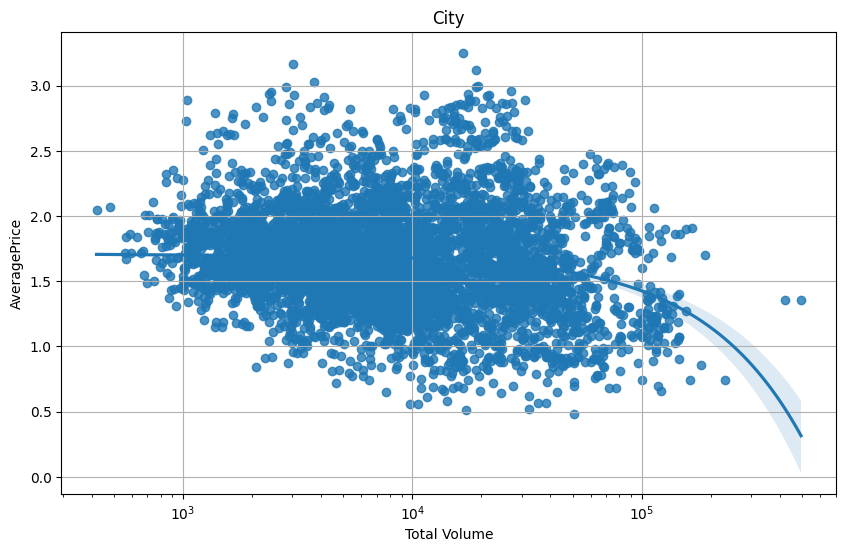

<Figure size 640x480 with 0 Axes>

In [6]:
df_local = df_cp.copy()
df_local= df_local[df_local['type']=='organic']

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_USA=df_local[df_local['region_class']=='TotalUS']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_USA , x=df_local_USA['Total Volume'], y=df_local_USA['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.grid()
plt.title('TotalUS')
plt.figure()

# df_local = df_cp[(df_cp['region']!='TotalUS')&(df_cp['region_class']!='GreaterRegion')].copy()
df_local_region=df_local[df_local['region_class']=='City']

fig, ax= plt.subplots(figsize=(10,6))

# sns.scatterplot(data= df_local , x=df_local['Total Volume'], y=df_local['AveragePrice'], alpha= 0.1)
sns.regplot(data= df_local_region , x=df_local_region['Total Volume'], y=df_local_region['AveragePrice'], order=1)#, line=True)
plt.xscale('log')
plt.title('City')
plt.grid()
plt.figure()

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.


In [7]:
df_local= df_cp.copy()

# df_local= df_local[df_local['region']=='West']
# df_local= df_local[df_local['type']=='conventional']

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Week'] = df_local['Date'].dt.to_period('W')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )

df_fit = df_local[df_local['Quarter Month']!=3 ]
df_check = df_local[df_local['Quarter Month']==3 ]

group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
group_fit['Quarter_n']=group_fit['Quarter'].map(lambda date: (date.month - 1) // 3 + 1)
# group_fit['Total Volume'] = np.log(group_fit['Total Volume'])

group_check = df_check.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
group_check['Quarter_n']=group_fit['Quarter'].map(lambda date: (date.month - 1) // 3 + 1)
# group_check['Total Volume'] = np.log(group_check['Total Volume'])

# group_fit.info()

# df_local

# group_fit


In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# Importar las bibliotecas necesarias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X_train= group_fit['Total Volume'].to_frame()
y_train= group_fit['AveragePrice']

# group_check = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X_test= group_check['Total Volume'].to_frame()
y_test= group_check['AveragePrice']

# ##########################################
# np.random.seed(42)
# X1 = np.random.rand(100)
# data = pd.DataFrame({
#     'X1': X1,
#     'X2': (X1 * 0.4) + 0.2,  # Alta correlación con X1
#     'X3': np.random.rand(100),               # Variable independiente
#     'X4': np.random.rand(100),               # Variable independiente
#     'Y': np.random.rand(100)                 # Variable objetivo
# })

# data_cleaned = data.drop(columns=['X2'])

# X = data_cleaned.drop(columns='Y')
# y = data_cleaned['Y']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)
##########################################
# Aplicar un modelo de regresión lineal para interpolar
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

# Calcular el valor R²
r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0    1.361981        1.457231         -6.993416
1    1.399074        1.390406          0.619524
2    1.449144        1.465267         -1.112623
3    1.305244        1.511523        -15.803887
4    1.224213        1.377051        -12.484576
5    1.283056        1.349849         -5.205829
6    1.427870        1.418188          0.678086
7    1.315995        1.462095        -11.101857
8    1.398935        1.423026         -1.722096
9    1.545395        1.347016         12.836834

Error cuadrático medio (MSE) del modelo: 0.0187

Valor R² del modelo: 0.1484


## 4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# df_local= df_cp.copy()

# df_local= df_local[df_local['region']=='West']
# df_local= df_local[df_local['type']=='conventional']

# df_local['Month'] = df_local['Date'].dt.to_period('M')
# df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
# df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
# df_local['Week'] = df_local['Date'].dt.to_period('W')
# df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
# df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)

# df_year = df_local[df_local['year']==2016]

# ########
# df_train = df_year[df_year['n_Quarter'].isin([1,2,3]) ]
# df_test= df_year[df_year['n_Quarter']==4 ]
# # display(df_local)

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train= df_train['Total Volume'].to_frame()
# y_train= df_train['AveragePrice']

# X_test= df_test['Total Volume'].to_frame()
# y_test= df_test['AveragePrice']

# ###########
# # Aplicar un modelo de regresión lineal para interpolar
# poly_features = PolynomialFeatures(degree=2)
# poly_model = LinearRegression()

# X_poly = poly_features.fit_transform(X_train)
# poly_model.fit(X_poly, y_train)
# y_pred_poly_train = poly_model.predict(X_poly)

# X_test_poly= poly_features.fit_transform(X_test)
# y_pred_poly_test = poly_model.predict(X_test_poly)


# r2_poly = r2_score(y_test, y_pred_poly_test)
# rmse_poly = root_mean_squared_error(y_test, y_pred_poly_test)

# #     "coeficientes": poly_model.coef_}


# # Comparar los primeros 10 valores entre el valor predicho y el valor real
# comparison_df = pd.DataFrame({
#     'Valor Real': y_test.head(10).values,
#     'Valor Predicho': y_pred_poly[:10]
# })

# # Calcular el error porcentual
# comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100
# print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# # Calcular el error cuadrático medio (MSE) para evaluar el modelo
# print(f"\nError cuadrático medio (MSE) del modelo: {rmse_poly:.4f}")

# # Calcular el valor R²
# print(f"\nValor R² del modelo: {r2_poly:.4f}")

## 5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

df_local= df_cp.copy()

df_local= df_local[df_local['region']=='West']
# df_local= df_local[df_local['type']=='conventional']

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Day'] = df_local['Date'].dt.to_period('d')#.weekday()
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Week'] = df_local['Date'].dt.to_period('W')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)

# df_year = df_local[df_local['year']==2016]

########
df_train = df_local[df_local['year'].isin([2015,2016]) ]
df_test= df_local[df_local['year']==2017 ]
# display(df_train)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train= df_train['Total Volume'].to_frame()
y_train= df_train['AveragePrice']

X_test= df_test['Total Volume'].to_frame()
y_test= df_test['AveragePrice']

###########
# Aplicar un modelo de regresión lineal para interpolar
poly_features = PolynomialFeatures(degree=1)
poly_model = LinearRegression()

X_poly = poly_features.fit_transform(X_train)
poly_model.fit(X_poly, y_train)
y_pred_poly_train = poly_model.predict(X_poly)

X_test_poly= poly_features.fit_transform(X_test)
y_pred_poly_test = poly_model.predict(X_test_poly)


r2_poly = r2_score(y_test, y_pred_poly_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly_test)

#     "coeficientes": poly_model.coef_}


# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred_poly_test[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100
print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# Calcular el error cuadrático medio (MSE) para evaluar el modelo
print(f"\nError cuadrático medio (MSE) del modelo: {rmse_poly:.4f}")

# Calcular el valor R²
print(f"\nValor R² del modelo: {r2_poly:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        0.94        0.898720          4.391467
1        1.10        1.016194          7.618772
2        1.05        1.026777          2.211689
3        0.96        0.936903          2.405935
4        0.98        0.902799          7.877666
5        1.18        1.106605          6.219942
6        1.04        0.998097          4.029177
7        1.01        0.913077          9.596343
8        1.06        0.890347         16.004960
9        1.23        1.014828         17.493639

Error cuadrático medio (MSE) del modelo: 0.1612

Valor R² del modelo: 0.2969


## 6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

In [11]:
from sklearn import preprocessing

df_local = df_cp.copy()

df_local=df_local[df_local['region']=='West']
# df_local=df_local[df_local['type']=='conventional']

bool_org= {'organic':1, 'conventional':0}

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_local['type_Bool'] = df_local['type'].map(bool_org)

df_local['Standard Volume'] = (df_local['Total Volume'] - df_local['Total Volume'].mean()) /df_local['Total Volume'].std()
df_local['ST_Volume_Hass_S'] = (df_local['Volume_Hass_S'] - df_local['Volume_Hass_S'].mean()) /df_local['Volume_Hass_S'].std()
df_local['ST_Volume_Hass_L'] = (df_local['Volume_Hass_L'] - df_local['Volume_Hass_L'].mean()) /df_local['Volume_Hass_L'].std()
df_local['ST_Volume_Hass_XL'] = (df_local['Volume_Hass_XL'] - df_local['Volume_Hass_XL'].mean()) /df_local['Volume_Hass_XL'].std()
df_local['Standard Bags'] = (df_local['Total Bags'] - df_local['Total Bags'].mean()) /df_local['Total Bags'].std()


# display(df_local)

Variables = ['Standard Volume', 'ST_Volume_Hass_S', 'ST_Volume_Hass_L', 'ST_Volume_Hass_XL', 'Standard Bags', 'n_Quarter', 'year', 'type_Bool']
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X= df_local[Variables]
Y= df_local['AveragePrice']#.to_frame()

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)

# group_check = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
# X_test= df_year.loc[2:3,'Total Volume'].to_frame()
# y_test= df_year.loc[2:3,'AveragePrice']#.to_frame()

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")


for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {model.coef_[i]}')

# Calcular el valor R²
r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.04        1.346012        -29.424213
1        1.41        1.633460        -15.848261
2        1.83        1.481107         19.065204
3        1.01        0.974764          3.488690
4        1.37        1.265711          7.612305
5        1.53        1.372671         10.282910
6        0.99        0.873281         11.789797
7        1.39        1.390366         -0.026329
8        1.43        1.267326         11.375813
9        0.98        1.045380         -6.671471

Error cuadrático medio (MSE) del modelo: 0.0424
El coeficiente Standard Volume	 	: -0.05010627011000214
El coeficiente ST_Volume_Hass_S	 	: 0.053397986048750054
El coeficiente ST_Volume_Hass_L	 	: -0.05476203655257157
El coeficiente ST_Volume_Hass_XL	 	: 0.0018534907128084643
El coeficiente Standard Bags	 	: -0.14610341859083548
El coeficiente n_Quarter	 	: 0.10528970208047722
El coefic

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

In [12]:
for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {model.coef_[i]}')

El coeficiente Standard Volume	 	: -0.05010627011000214
El coeficiente ST_Volume_Hass_S	 	: 0.053397986048750054
El coeficiente ST_Volume_Hass_L	 	: -0.05476203655257157
El coeficiente ST_Volume_Hass_XL	 	: 0.0018534907128084643
El coeficiente Standard Bags	 	: -0.14610341859083548
El coeficiente n_Quarter	 	: 0.10528970208047722
El coeficiente year	 	: 0.1285164370946673
El coeficiente type_Bool	 	: 0.23030004503392748


8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

# Ejemplo De Modelo Final

In [13]:
df_local = df_cp.copy()
df_local = df_local.sort_values(by=['region', 'type', 'year'])
display(df_local)

,Col_0,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region



Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.04        1.139885         -9.604288
1        1.41        1.438219         -2.001369
2        1.83        1.799041          1.691744
3        1.01        0.940126          6.918212
4        1.37        1.346056          1.747743
5        1.53        1.528976          0.066899
6        0.99        0.911013          7.978496
7        1.39        1.349376          2.922580
8        1.43        1.422922          0.494951
9        0.98        0.904683          7.685384

Error cuadrático medio (MSE) del modelo: 0.0073
El coeficiente Standard Volume	 	: -157909.33551370245
El coeficiente year	 	: 119074.52579389374
El coeficiente n_week	 	: -532309.8827663932
El coeficiente type_Bool	 	: -6858.844755373939

Valor R² del modelo: 0.947217

La diferencia entre los Valores R² del modelo: 0.010426


/tmp/ipykernel_579/3361354463.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


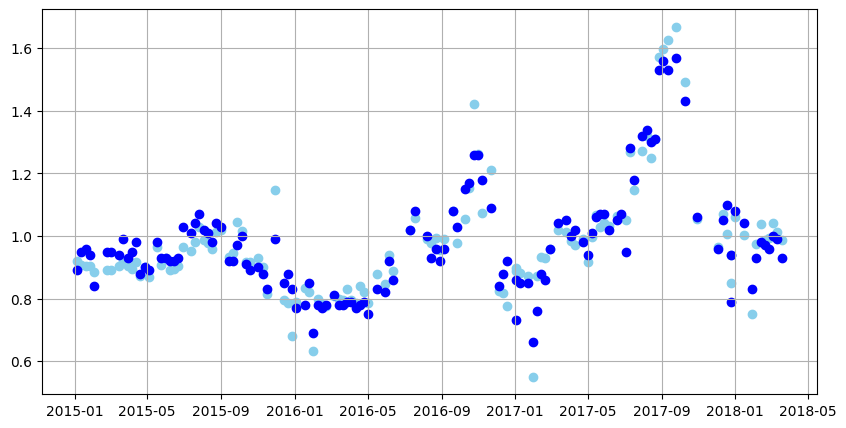

In [14]:
### Primer ejemplo del modelo Final que vamos a mostrar. Incluye un plotting avanzado y las variables X más importantes

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import datetime

df_local = df_cp.copy()

df_local=df_local[df_local['region']=='West']

bool_org= {'organic':1, 'conventional':0}

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['n_week'] = df_local['Date'].dt.isocalendar().week#.dt.to_period('W').strftime('%V')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_local['type_Bool'] = df_local['type'].map(bool_org)

df_local['Standard Volume'] = (df_local['Total Volume'] - df_local['Total Volume'].mean()) /df_local['Total Volume'].std()
df_local['ST_Volume_Hass_S'] = (df_local['Volume_Hass_S'] - df_local['Volume_Hass_S'].mean()) /df_local['Volume_Hass_S'].std()
df_local['ST_Volume_Hass_L'] = (df_local['Volume_Hass_L'] - df_local['Volume_Hass_L'].mean()) /df_local['Volume_Hass_L'].std()
df_local['ST_Volume_Hass_XL'] = (df_local['Volume_Hass_XL'] - df_local['Volume_Hass_XL'].mean()) /df_local['Volume_Hass_XL'].std()
df_local['Standard Bags'] = (df_local['Total Bags'] - df_local['Total Bags'].mean()) /df_local['Total Bags'].std()

# display(df_local)

# display(df_local)

Variables = ['Standard Volume', 'year','n_week', 'type_Bool'] #,,,  , 'ST_Volume_Hass_XL',  'ST_Volume_Hass_S', 'ST_Volume_Hass_L' , 'Standard Bags', 'n_Quarter'
# group_fit = df_fit.groupby('Quarter').agg({'AveragePrice':'mean', 'Total Volume':'mean' }).reset_index()
X= df_local[Variables]
Y= df_local['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###########
# Aplicar un modelo de regresión lineal para interpolar
poly_features = PolynomialFeatures(degree=3)
poly_model = LinearRegression()

X_poly = poly_features.fit_transform(X_train)
poly_model.fit(X_poly, y_train)
y_pred_poly_train = poly_model.predict(X_poly)

X_test_poly= poly_features.fit_transform(X_test)
y_pred_poly_test = poly_model.predict(X_test_poly)

y_pred_poly_train = poly_model.predict(X_poly)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred_poly_test[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred_poly_test)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")


for i in range(0, len(Variables)):
    
    print(f'El coeficiente {Variables[i]}\t \t: {poly_model.coef_[i]}')

# Calcular el valor R²
r2_test = r2_score(y_test, y_pred_poly_test)
r2_train = r2_score(y_train, y_pred_poly_train)

print(f"\nValor R² del modelo: {r2_test:.6f}")
print(f"\nLa diferencia entre los Valores R² del modelo: {r2_train- r2_test:.6f}")



#############################################################################################################
# Plotting


fig, ax= plt.subplots(figsize= (10,5))

X_to_plot = X_train[X_train['type_Bool']==0]
X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


y_pred_plot = y_pred_poly_train[X_train['type_Bool']==0]
Y_to_plot = y_train[X_train['type_Bool']==0]



plt.scatter(x = X_to_plot['Date'], y= y_pred_plot, color= 'Skyblue')
plt.scatter(x = X_to_plot['Date'], y= Y_to_plot, color= 'blue')
plt.grid()
plt.show()
# print(X_train, y_pred_poly_train)

# Comparación de módelos

In [47]:
from sklearn import preprocessing
import pandas as pd
import datetime
import numpy as np
import random

df_local = df_cp.copy()

bool_org= {'organic':1, 'conventional':0}

df_local['Month'] = df_local['Date'].dt.to_period('M')
df_local['Quarter'] = df_local['Date'].dt.to_period('Q')
df_local['n_week'] = df_local['Date'].dt.isocalendar().week#.dt.to_period('W').strftime('%V')
df_local['Quarter Month'] = df_local['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_local['n_Quarter'] = df_local['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_local['type_Bool'] = df_local['type'].map(bool_org)

df_local['Standard Volume'] = (df_local['Total Volume'] - df_local['Total Volume'].mean()) /df_local['Total Volume'].std()
df_local['ST_Volume_Hass_S'] = (df_local['Volume_Hass_S'] - df_local['Volume_Hass_S'].mean()) /df_local['Volume_Hass_S'].std()
df_local['ST_Volume_Hass_L'] = (df_local['Volume_Hass_L'] - df_local['Volume_Hass_L'].mean()) /df_local['Volume_Hass_L'].std()
df_local['ST_Volume_Hass_XL'] = (df_local['Volume_Hass_XL'] - df_local['Volume_Hass_XL'].mean()) /df_local['Volume_Hass_XL'].std()
df_local['Standard Bags'] = (df_local['Total Bags'] - df_local['Total Bags'].mean()) /df_local['Total Bags'].std()

In [48]:
diccionario_regressiones = {'Region' : [], 
                            'Variables' : [], 
                            'R_2' : [], 
                            'Var_R' : [] , 
                            'Random_seed' : []}
                           # 'TotalUS comp' : []}

In [49]:

Variables = ['Standard Volume', 'year','n_week', 'type_Bool'] #,,,  , , 'ST_Volume_Hass_XL',  'ST_Volume_Hass_S', 'ST_Volume_Hass_L' , 'Standard Bags', 'n_Quarter'
for region in pd.unique(df_local['region'] ):

    for random_seed in range(0,30):

        df_temp_region = df_local[df_local['region'] == region]
    
        X= df_temp_region[Variables]
        Y= df_temp_region['AveragePrice']
    
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_seed)
    
        
    
        ###########
        # Aplicar un modelo de regresión lineal para interpolar
        poly_features = PolynomialFeatures(degree=9)
        poly_model = LinearRegression()
        
        X_poly = poly_features.fit_transform(X_train)
        poly_model.fit(X_poly, y_train)
        y_pred_poly_train = poly_model.predict(X_poly)
        
        X_test_poly= poly_features.fit_transform(X_test)
        y_pred_poly_test = poly_model.predict(X_test_poly)
        
        y_pred_poly_train = poly_model.predict(X_poly)
        
        
        # Calcular el valor R²
        r2_test = r2_score(y_test, y_pred_poly_test)
        r2_train = r2_score(y_train, y_pred_poly_train)
    
    
    
        # ########USA
        # # Calcular el valor R²
    
        # df_temp_USA = df_local[df_local['region'] == 'TotalUS']
    
        # X_USA= df_temp_USA[Variables]
        # Y_USA= df_temp_USA['AveragePrice']   
    
        # X_USA_train, X_USA_test, y_USA_train, y_USA_test = train_test_split(X_USA, Y_USA, test_size=0.2, random_state=random_seed)
        # X_poly_USA_train = poly_features.fit_transform(X_USA_train)
        
        # y_pred_USA_train = poly_model.predict(X_poly_USA_train)
        # r2_USA_train = r2_score(y_USA_train, y_pred_USA_train)
    
    
            # Calcular el valor R²
        r2_test = r2_score(y_test, y_pred_poly_test)
        r2_train = r2_score(y_train, y_pred_poly_train)
    
        diccionario_regressiones['Region'].append(region)
        diccionario_regressiones['Variables'].append(Variables)
        diccionario_regressiones['R_2'].append(r2_test)
        diccionario_regressiones['Var_R'].append(abs(r2_train - r2_test))
        diccionario_regressiones['Random_seed'].append(random_seed)


Resultados_df= pd.DataFrame(diccionario_regressiones)


best_regions = Resultados_df.groupby('Region')['R_2'].max()

display(Resultados_df[Resultados_df['Region'] == 'California'].sort_values(by = 'R_2', ascending = False))

,Region,Variables,R_2,Var_R,Random_seed
200,California,"[Standard Volume, year, n_week, type_Bool]",0.969116,0.021308,20
196,California,"[Standard Volume, year, n_week, type_Bool]",0.961284,0.000971,16
195,California,"[Standard Volume, year, n_week, type_Bool]",0.961119,0.002489,15
208,California,"[Standard Volume, year, n_week, type_Bool]",0.961030,0.000401,28
207,California,"[Standard Volume, year, n_week, type_Bool]",0.960159,0.002380,27
209,California,"[Standard Volume, year, n_week, type_Bool]",0.956538,0.006213,29
192,California,"[Standard Volume, year, n_week, type_Bool]",0.950903,0.012921,12
184,California,"[Standard Volume, year, n_week, type_Bool]",0.950259,0.011986,4
182,California,"[Standard Volume, year, n_week, type_Bool]",0.946988,0.015874,2
187,California,"[Standard Volume, year, n_week, type_Bool]",0.944280,0.020581,7


# Modelo de predicción

### Inicializacion

In [166]:
from sklearn import preprocessing
import pandas as pd
import datetime
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

## Modelo Predicción variables independientes (Total Volume)

### Entrenamiento modelo Total Volume

In [167]:
# Para poder predecir el average price en un periodo que no conocemos, 
# Necesitamos predecir previamente el volúmen de venta o Total Volume
# Este modelo sera por una sola región, Californai

df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

df_cp['region_class']= df_cp['region'].map(region_classification)

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})

df_modelo_volume= df_cp.copy()
# df_modelo_volume= df_modelo_volume[df_modelo_volume['region'] == 'California']

bool_org= {'organic':1, 'conventional':0}

df_modelo_volume['Month'] = df_modelo_volume['Date'].dt.to_period('M')
df_modelo_volume['Quarter'] = df_modelo_volume['Date'].dt.to_period('Q')
df_modelo_volume['n_week'] = df_modelo_volume['Date'].dt.isocalendar().week#.dt.to_period('W').strftime('%V')
df_modelo_volume['Quarter Month'] = df_modelo_volume['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_modelo_volume['n_Quarter'] = df_modelo_volume['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_modelo_volume['type_Bool'] = df_modelo_volume['type'].map(bool_org)


In [168]:
# Creación de modelo total Volume

Variables_vol = ['year','n_week', 'type_Bool']

df_temp_region = df_modelo_volume[df_modelo_volume['region'] == 'California']


X_Volume= df_temp_region[Variables_vol]
Y_Volume= df_temp_region['Total Volume']

X_train_vol, X_test_vol, y_train_vol, y_test_vol = train_test_split(X_Volume, Y_Volume, test_size=0.1, random_state=42) # TODO escoger random seed

###########
# Training the volume prediction model
vol_poly_features = PolynomialFeatures(degree=7)
vol_poly_model = LinearRegression()

X_poly_train_vol = vol_poly_features.fit_transform(X_train_vol)
vol_poly_model.fit(X_poly_train_vol, y_train_vol)
y_pred_vol_train = vol_poly_model.predict(X_poly_train_vol)

X_poly_test_vol= vol_poly_features.fit_transform(X_test_vol)
y_pred_vol_test = vol_poly_model.predict(X_poly_test_vol)

# Calcular el valor R²
r2_test = r2_score(y_test_vol, y_pred_vol_test)
r2_train = r2_score(y_train_vol, y_pred_vol_train)

print(f"\nValor R² del modelo: {r2_test:.6f}")
print(f"\nLa diferencia entre los Valores R² del modelo: {r2_train- r2_test:.6f}")


Valor R² del modelo: 0.967640

La diferencia entre los Valores R² del modelo: -0.007140


### Visualización modelo total Volume

En este apartado visualizaremos lso resultados del modelo de total Volume. En este caso como las variables independientes son únicamente temporales es muy dificil poder obtener un valor suficientemente certero. Aun asi esta estimación sera suficiente por el momento 

/tmp/ipykernel_983/2484599523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


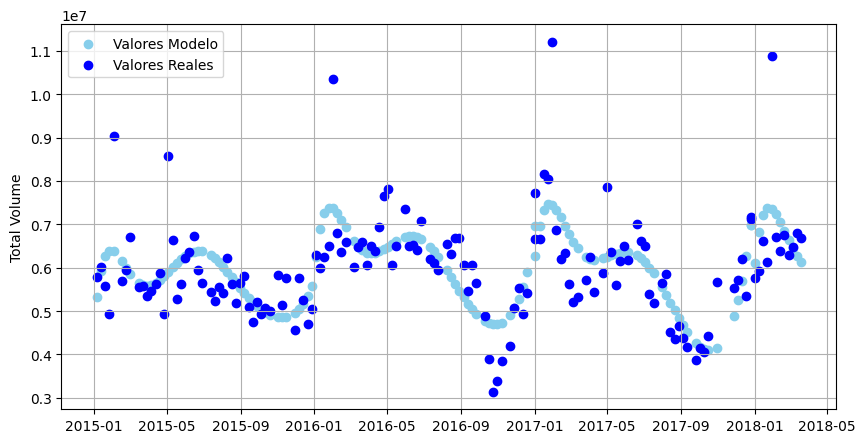

In [169]:
# Visualcización del modelo de total Volume
fig, ax= plt.subplots(figsize= (10,5))

tipo_aguacate_plot = 0

X_to_plot = X_train_vol[X_train_vol['type_Bool']==tipo_aguacate_plot]
X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


y_pred_plot = y_pred_vol_train[X_train_vol['type_Bool']==tipo_aguacate_plot]
Y_to_plot = y_train_vol[X_train_vol['type_Bool']==tipo_aguacate_plot]

plt.scatter(x = X_to_plot['Date'], y= y_pred_plot, color= 'Skyblue', label= 'Valores Modelo')
plt.scatter(x = X_to_plot['Date'], y= Y_to_plot, color= 'blue', label= 'Valores Reales')
plt.ylabel('Total Volume')
plt.grid()
plt.legend()
plt.show()

### Prediccion Total Volume

In [301]:
# df_temp_region

In [323]:
X_for_vol = pd.DataFrame()

# Number of dates you want in the list
length_prediction = 200

start_date = df_temp_region['Date'].max()#.min()
start_date = datetime.datetime.strptime( '2015-01-01', '%Y-%m-%d')#.timestamp()#.date()#'2018-01-01'

print(type(start_date))
# start_date = datetime.datetime(01,01,2018)
interval = datetime.timedelta(days=7)

# Generate X values needed for prediction
X_for_vol['Date'] = pd.DataFrame([start_date + i * interval for i in range(length_prediction)])

X_for_vol['n_week'] = X_for_vol['Date'].dt.isocalendar().week
X_for_vol['year'] = X_for_vol['Date'].dt.year
X_for_vol['type_Bool'] = 0

X_for_vol = X_for_vol[Variables_vol]
# X_for_vol

<class 'datetime.datetime'>


In [324]:
X_poly_for_vol= vol_poly_features.fit_transform(X_for_vol)
vol_prediction = vol_poly_model.predict(X_poly_for_vol)

### Visualizacion predicciones total Volume

/tmp/ipykernel_983/1604156053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


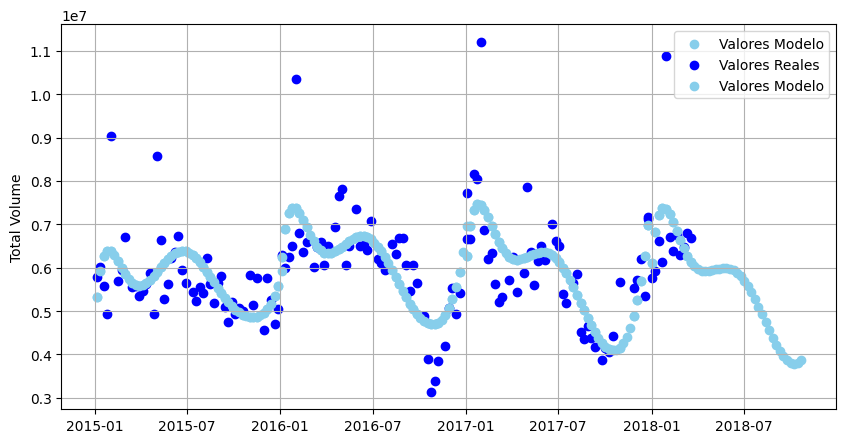

In [325]:
X_for_vol_temp = X_for_vol.copy()

fig, ax= plt.subplots(figsize= (10,5))

tipo_aguacate_plot = 0

X_to_plot = X_train_vol[X_train_vol['type_Bool']==tipo_aguacate_plot]
X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)

X_for_vol_temp.loc[:,'Date'] = X_for_vol_temp.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)

y_pred_plot = y_pred_vol_train[X_train_vol['type_Bool']==tipo_aguacate_plot]
Y_to_plot = y_train_vol[X_train_vol['type_Bool']==tipo_aguacate_plot]

plt.scatter(x = X_to_plot['Date'], y= y_pred_plot, color= 'Skyblue', label= 'Valores Modelo')
plt.scatter(x = X_to_plot['Date'], y= Y_to_plot, color= 'blue', label= 'Valores Reales')
plt.scatter(x = X_for_vol_temp['Date'], y= vol_prediction, color= 'Skyblue', label= 'Valores Modelo')
plt.ylabel('Total Volume')
plt.grid()
plt.legend()
plt.show()

## Creación Modelo Variable dependiente

In [326]:
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

df_cp['region_class']= df_cp['region'].map(region_classification)

df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})

df_modelo_avprice_total= df_cp.copy()
# df_modelo_volume= df_modelo_volume[df_modelo_volume['region'] == 'California']

bool_org= {'organic':1, 'conventional':0}

df_modelo_avprice_total['Month'] = df_modelo_avprice_total['Date'].dt.to_period('M')
df_modelo_avprice_total['Quarter'] = df_modelo_avprice_total['Date'].dt.to_period('Q')
df_modelo_avprice_total['n_week'] = df_modelo_avprice_total['Date'].dt.isocalendar().week#.dt.to_period('W').strftime('%V')
df_modelo_avprice_total['Quarter Month'] = df_modelo_avprice_total['Month'].map(lambda x: (x.month - 1) % 3 + 1 )
df_modelo_avprice_total['n_Quarter'] = df_modelo_avprice_total['Month'].map(lambda date: (date.month - 1) // 3 + 1)
df_modelo_avprice_total['type_Bool'] = df_modelo_avprice_total['type'].map(bool_org)
df_modelo_avprice_total['Standard Volume'] = (df_modelo_avprice_total['Total Volume'] - df_modelo_avprice_total['Total Volume'].mean()) /df_modelo_avprice_total['Total Volume'].std()

print(df_modelo_avprice['Total Volume'].mean() , df_modelo_avprice['Total Volume'].std())

3044324.417662722 3012443.205535852


In [327]:
# Creación de modelo total Volume

Variables_avprice = ['Standard Volume', 'year','n_week', 'type_Bool']

df_modelo_avprice = df_modelo_avprice[df_modelo_avprice['region'] == 'California']

X_Price= df_modelo_avprice[Variables_avprice]
Y_Price= df_modelo_avprice['AveragePrice']

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_Price, Y_Price, test_size=0.1, random_state=20) # TODO escoger random seed


###########
# Training the volume prediction model
price_poly_features = PolynomialFeatures(degree=9)
price_poly_model = LinearRegression()

X_poly_train_price = price_poly_features.fit_transform(X_train_price)
price_poly_model.fit(X_poly_train_price, y_train_price)
y_pred_price_train = price_poly_model.predict(X_poly_train_price)

X_poly_test_price= price_poly_features.fit_transform(X_test_price)
y_pred_price_test = price_poly_model.predict(X_poly_test_price)

# Calcular el valor R²
r2_test = r2_score(y_test_price, y_pred_price_test)
r2_train = r2_score(y_train_price, y_pred_price_train)

print(f"\nValor R² del modelo: {r2_test:.6f}")
print(f"\nLa diferencia entre los Valores R² del modelo: {r2_train- r2_test:.6f}")

# # Comparar los primeros 10 valores entre el valor predicho y el valor real
# comparison_df = pd.DataFrame({
#     'Valor Real': y_test_price.head(10).values,
#     'Valor Predicho': y_pred_price_test[:10]
# })
# # TODO COMPROVAR VALORES
# # Calcular el error porcentual
# comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

# print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


Valor R² del modelo: 0.969116

La diferencia entre los Valores R² del modelo: -0.021308


## Predicción Variable Dependiente

In [328]:
X_for_vol ['Total Volume'] = vol_prediction

X_for_vol['Standard Volume'] = (X_for_vol['Total Volume'] - df_modelo_avprice_total['Total Volume'].mean()) /df_modelo_avprice_total['Total Volume'].std()

print(df_modelo_avprice['Total Volume'].mean() , df_modelo_avprice['Total Volume'].std())
X_for_price = X_for_vol[Variables_avprice]

# X_for_vol

3044324.417662722 3012443.205535852


In [329]:
X_poly_for_price = price_poly_features.fit_transform(X_for_price)
Prediction_price = price_poly_model.predict(X_poly_for_price)
# X_for_vol

## Visualización final predicciones

In [260]:
# a = df_modelo_avprice [df_modelo_avprice['region'] == 'California']
# a.sort_values(by = 'Date')

In [189]:
# X_to_plot.iloc[-30:-1, :]

In [190]:
# X_for_price

/tmp/ipykernel_983/910007891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)


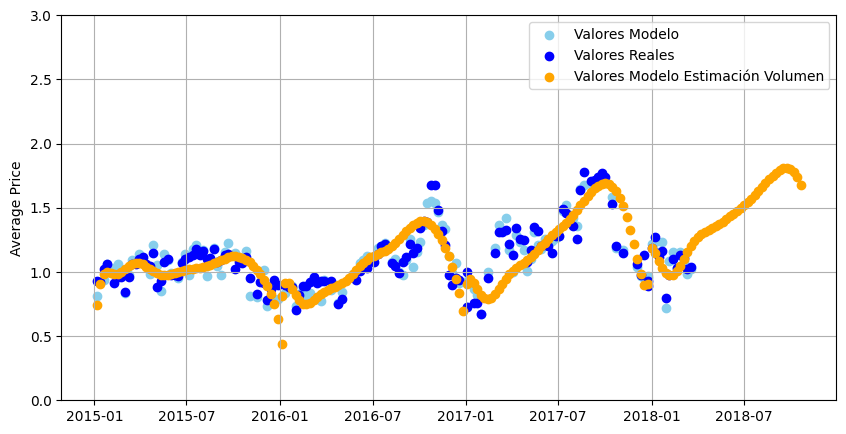

In [330]:
X_for_price_temp = X_for_price.copy()

fig, ax= plt.subplots(figsize= (10,5))

tipo_aguacate_plot = 0

y_pred_plot = y_pred_price_train[X_train_price['type_Bool']==tipo_aguacate_plot]
Y_to_plot = y_train_price[X_train_price['type_Bool']==tipo_aguacate_plot]
X_to_plot = X_train_price[X_train_price['type_Bool']==tipo_aguacate_plot]


X_to_plot.loc[:,'Date'] = X_to_plot.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)
X_for_price_temp.loc[:,'Date'] = X_for_vol_temp.apply(lambda x: datetime.datetime.strptime(str(int(x['year'])) +'-W'+ str(int(x['n_week'])) + '-1', "%Y-W%W-%w"), axis=1)



plt.scatter(x = X_to_plot['Date'], y= y_pred_plot, color= 'Skyblue', label= 'Valores Modelo')
plt.scatter(x = X_to_plot['Date'], y= Y_to_plot, color= 'blue', label= 'Valores Reales')
plt.scatter(x = X_for_price_temp['Date'], y= Prediction_price, color= 'orange', label= 'Valores Modelo Estimación Volumen')
plt.ylim(0,3)
plt.ylabel('Average Price')
plt.grid()
plt.legend()
plt.show()

# TO-DO

Arreglar el problema de visualización correctamente, conseguir convertir year + #week into a datetime.
Crear el modelo base en el tiempo, para que entrene de manera aleatoria con la mayor parte de los datos (Mostreo correcto), testee en una pequeña parte y tratar de predecir futuros valores. Greater Region.
Idealmente hacer un sistema que pueda entrenar multiples modelos y devuelva una matriz con los mejores modelos a comparar, escogiendo cada vez un conjunto de datos diferentes que se mantienen ocultos.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.


10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.